# **Análise Profunda das Vendas da Superstore:Tendências e Insights**
<img src= "https://www.crushpixel.com/big-static14/preview4/sale-background-1571690.jpg"  width=800>

- Utilizaremos para essa análise os dados acessíveis no [Kaggle](https://www.kaggle.com/datasets/jr2ngb/superstore-data)

## **Introdução**
A análise de dados desempenha um papel fundamental na identificação de insights para orientar decisões estratégicas e aprimorar o desempenho de negócios. Nesse contexto, a exploração do conjunto de dados Superstore, obtido a partir do Kaggle, oferece uma oportunidade única para compreender os padrões de compra por região e identificar os produtos mais vendidos. O objetivo desta análise é extrair informações relevantes que possam contribuir para a tomada de decisões informadas, a otimização de estratégias de vendas e a maximização dos resultados.

###**Objetivos da Análise**

**Explorar Padrões de Compra por Região:** Investigaremos como os padrões de compra variam entre diferentes regiões. Compreender as preferências regionais pode informar decisões estratégicas de marketing e estoque, além de destacar oportunidades para atender às demandas específicas de cada local.

**Identificar os Produtos Mais Vendidos**: Vamos identificar os produtos que tiveram o maior volume de vendas. Essa informação pode orientar decisões relacionadas à gestão de estoque, promoções e expansão do catálogo de produtos.

###**Metodologia**
Para alcançar nossos objetivos, seguiremos uma abordagem sistemática de análise de dados:

**[Conhecendo os Dados:](#inicio)** Iniciaremos examinando a estrutura do conjunto de dados Superstore, identificando as principais variáveis e compreendendo sua natureza.

**[Análise Exploratória:](#exploratoria)** Realizaremos uma análise exploratória inicial, que incluirá estatísticas descritivas e visualizações gráficas para ter uma visão geral dos dados.

**[Análise por Região:](#regiao)** Investigaremos como as vendas variam entre as diferentes regiões. Isso envolverá a criação de gráficos e tabelas para identificar padrões regionais.

**[Identificação dos Produtos Mais Vendido:](#produtos)** Utilizaremos técnicas de agregação e classificação para identificar os produtos que tiveram o maior número de vendas.

<a name='inicio'></a>
## Conhecendo a base de dados:

### Importando Bibliotecas:

In [1]:
#importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizando o dataframe

In [2]:
# Visualizando a base de dados
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding="ISO-8859-1")

df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [3]:
#Visualizando as colunas.
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
#Verificando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
#Verificando o tipo dos dados
df.dtypes.value_counts()

object     17
float64     5
int64       2
dtype: int64

<a name='exploratoria'></a>
## Análise Exploratória

Na análise descritiva vamos explorar e descrever as característocas essenciais de um conjunto de dados.

### Identificando e tratando valores nulos:

In [6]:
# Identificando os valores nulos
df.isnull().sum().sort_values(ascending=False).head()

Postal Code      41296
Row ID               0
Region               0
Shipping Cost        0
Profit               0
dtype: int64

**Conforme verificado, a unica coluna que possue valores nulos é a coluna "Postal Code"**

Como temos colunas referente a cidades e estados, vamos excluir a coluna Postal Code do dataframe

In [7]:
df = df.drop('Postal Code', axis = 1)

In [8]:
#Visualizando as colunas novamente.
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

### Identificando valores duplicados:

In [9]:
df.duplicated().sum()

0

### Resumo Estatístico:

In [10]:
#Identificando váriaveis numéricas
df_numeric_col = df.columns[df.dtypes != 'object']


In [11]:
df_numeric_col = df_numeric_col.drop('Row ID')

In [12]:
#Selecionando apenas os valores numericos
df_numeric = df.loc[:,df_numeric_col]
df_numeric

,Sales,Quantity,Discount,Profit,Shipping Cost
0,408.300,2,0.0,106.1400,35.46
1,120.366,3,0.1,36.0360,9.72
2,66.120,4,0.0,29.6400,8.17
3,44.865,3,0.5,-26.0550,4.82
4,113.670,5,0.1,37.7700,4.70
...,...,...,...,...,...
51285,13.904,2,0.2,4.5188,0.89
51286,3.990,1,0.0,0.4200,0.49
51287,26.400,3,0.0,12.3600,0.35
51288,7.120,1,0.0,0.5600,0.20


In [13]:
# Calcular estatísticas descritivas
desc_stats = df_numeric.describe()
print("Estatísticas Descritivas:")
print(desc_stats)


Estatísticas Descritivas:
              Sales      Quantity      Discount        Profit  Shipping Cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581      3.476545      0.142908     28.610982      26.375915
std      487.565361      2.278766      0.212280    174.340972      57.296804
min        0.444000      1.000000      0.000000  -6599.978000       0.000000
25%       30.758625      2.000000      0.000000      0.000000       2.610000
50%       85.053000      3.000000      0.000000      9.240000       7.790000
75%      251.053200      5.000000      0.200000     36.810000      24.450000
max    22638.480000     14.000000      0.850000   8399.976000     933.570000


<a name='regiao'></a>
## Análise de Desempenho por Região: Vendas, Quantidade e Lucro

In [14]:
#Somando por regiao
grup_reg = df.groupby(['Region']).sum().reset_index()

<ipython-input-14-a2fc5ce5a26b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup_reg = df.groupby(['Region']).sum().reset_index()


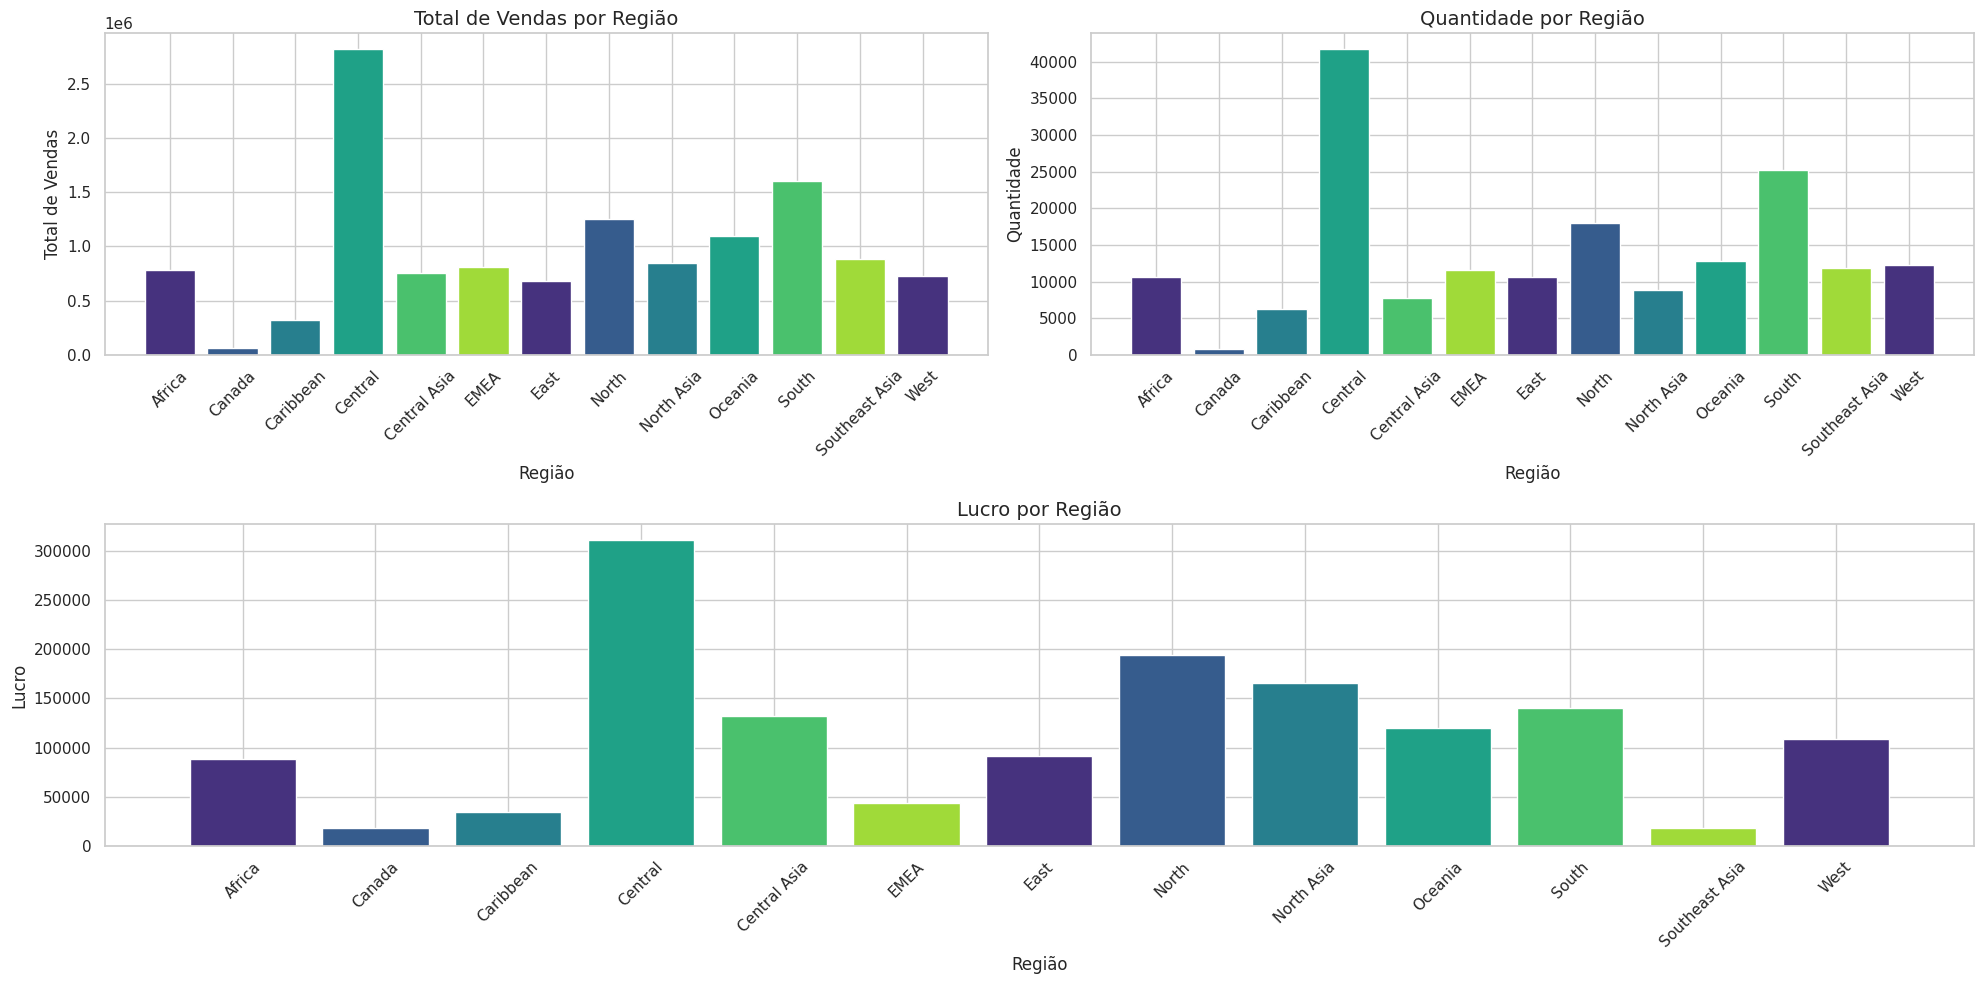

In [15]:
#Visualizando os dados de venda por Regiao
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.bar(grup_reg['Region'],grup_reg['Sales'], color = sns.color_palette("viridis"))
plt.xlabel('Região', fontsize=12)
plt.ylabel('Total de Vendas',  fontsize=12)
plt.title('Total de Vendas por Região', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()


#Visualizando os dados de quantidade por Regiao

plt.subplot(2,2,2)
plt.bar(grup_reg['Region'],grup_reg['Quantity'], color = sns.color_palette("viridis"))
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade',  fontsize=12)
plt.title('Quantidade por Região', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
#Visualizando os lucros por Regiao
plt.subplot(2,1,2)
plt.bar(grup_reg['Region'],grup_reg['Profit'], color = sns.color_palette("viridis"))
plt.xlabel('Região', fontsize=12)
plt.ylabel('Lucro',  fontsize=12)
plt.title('Lucro por Região', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Insight:**

Ao analisar os gráficos que representam vendas, quantidades e lucros por região, torna-se evidente uma distinção significativa entre o desempenho das regiões. O Canadá emerge como a região com o menor valor de vendas, menor quantidade de produtos vendidos e menor lucro entre todas as regiões consideradas. Essa constante presença na parte inferior dos gráficos destaca a necessidade de uma avaliação mais profunda das estratégias de mercado e abordagens de vendas empregadas nessa região, visando identificar oportunidades para impulsionar o crescimento.

Por outro lado, a região central se destaca como a líder incontestável nos três indicadores-chave: vendas, quantidades e lucros. Essa notável performance da região central ressalta sua importância como um motor impulsionador dos resultados globais da empresa. A alta posição nos gráficos reflete a influência positiva das estratégias implementadas e sugere uma abordagem bem-sucedida em termos de vendas e lucratividade.icas de mercado visando melhorar o desempenho das vendas no Canadá.

<a name='produtos'></a>

## Identificação dos Produtos Mais Vendidos:

In [16]:
grup_product_category = df.groupby(['Category']).sum().reset_index()
grup_product_sub_category =  df.groupby(['Sub-Category']).sum().reset_index()


<ipython-input-16-6e1ce1c13ba3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup_product_category = df.groupby(['Category']).sum().reset_index()
<ipython-input-16-6e1ce1c13ba3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup_product_sub_category =  df.groupby(['Sub-Category']).sum().reset_index()


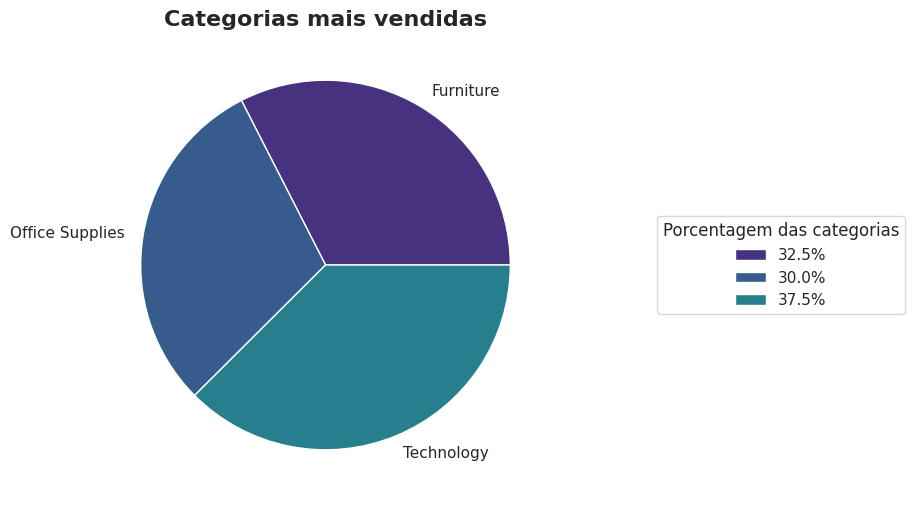

In [29]:
plt.figure (figsize =(8,6))
colors = sns.color_palette('viridis')
wedges, texts = plt.pie(grup_product_category['Sales'], labels=grup_product_category['Category'], colors= colors)  # Mantém o aspecto igual para parecer uma pizza
total_sales = sum(grup_product_category['Sales'])
percentages = [f'{(sale / total_sales) * 100:.1f}%' for sale in grup_product_category['Sales']]
plt.title('Categorias mais vendidas', fontsize=16, fontweight='bold')
plt.legend(percentages, title='Porcentagem das categorias', loc='center left', bbox_to_anchor=(1.2, 0.5))





**Insight:**

Ao analisar o gráfico de pizza das vendas por categorias de produtos, podemos destacar algumas informações interessantes. A categoria de tecnologia se destaca como a mais vendida, representando uma parcela significativa das vendas totais. Por outro lado, observamos que a categoria de material de escritório apresenta as vendas menos expressivas.

Essa disparidade nas vendas entre as categorias de tecnologia e material de escritório pode ser atribuída a uma série de fatores. A crescente demanda por produtos tecnológicos, como dispositivos eletrônicos e gadgets, pode estar impulsionando as vendas nessa categoria. Por outro lado, a categoria de material de escritório pode ter um mercado mais estável, com menor variação nas vendas ao longo do tempo.


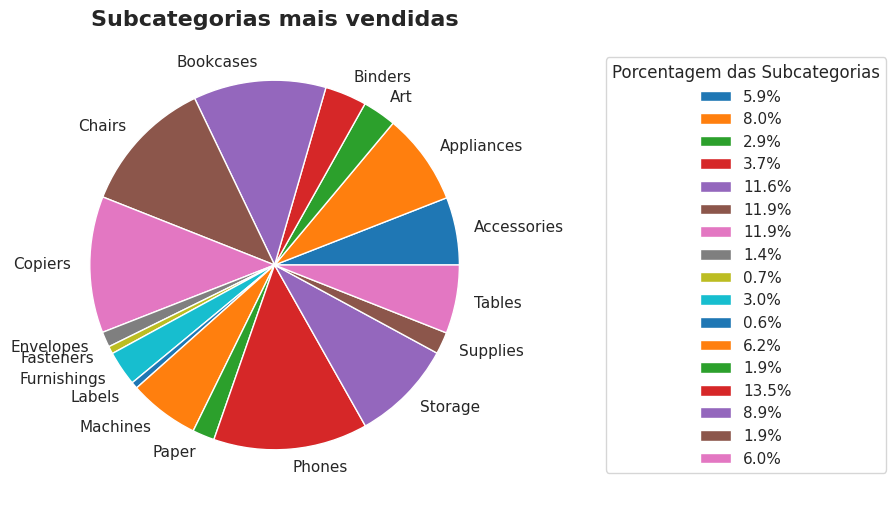

In [31]:
plt.figure (figsize =(8,6))
wedges, texts = plt.pie(grup_product_sub_category['Sales'], labels=grup_product_sub_category['Sub-Category'], colors= sns.color_palette('tab10'))  # Mantém o aspecto igual para parecer uma pizza
total_sales = sum(grup_product_sub_category['Sales'])
percentages = [f'{(sale / total_sales) * 100:.1f}%' for sale in grup_product_sub_category['Sales']]
plt.title('Subcategorias mais vendidas', fontsize=16, fontweight='bold')
plt.legend(percentages, title='Porcentagem das Subcategorias', loc='center left', bbox_to_anchor=(1.2, 0.5))

**Insights:**

Ao analisar os dados das vendas por subcategorias de produtos, identificamos um padrão distintivo. A subcategoria de "Telefones" emerge claramente como a mais vendida, representando uma parcela significativa do total de vendas. Essa subcategoria lidera em termos de desempenho de vendas, superando outras subcategorias.

A popularidade das vendas de telefones pode ser atribuída a diversos fatores, como a constante evolução da tecnologia, o lançamento de novos modelos e recursos inovadores, bem como a crescente demanda dos consumidores por dispositivos de comunicação eficientes.